# Lab 8 Austin Nguyen

November 15, 2024

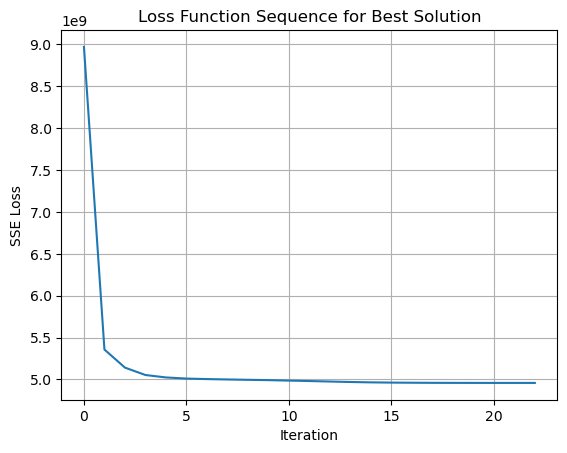

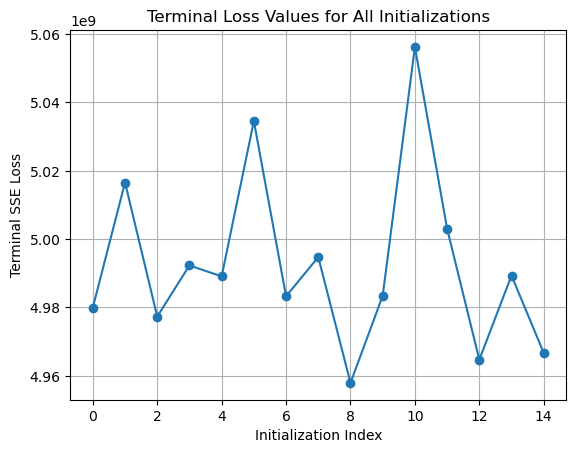

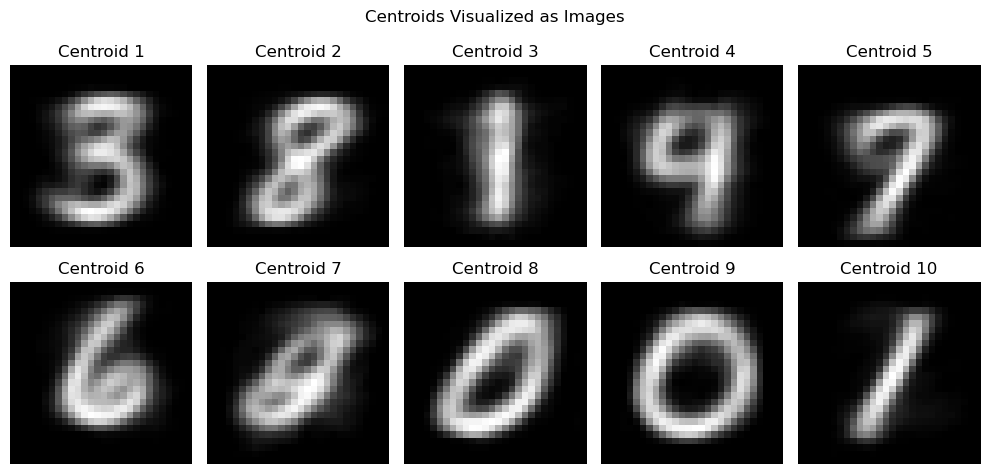

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Dataset
mnist = fetch_openml("mnist_784", version=1)
X = mnist["data"][:2000].to_numpy()  # Use only the first 2000 samples and convert to NumPy array
SEED = 42  
rng = np.random.default_rng(SEED)    # Seed for reproductivity

def my_kmeans(X, K, M):
    n_samples, n_features = X.shape
    best_loss = float('inf')
    best_centroids = None
    best_assignments = None
    best_loss_sequence = None
    terminal_losses = []

    for m in range(M):  # Outer loop over initializations
        # Randomly initialize centroids
        centroids = X[rng.choice(n_samples, K, replace=False)]
        prev_assignments = np.zeros(n_samples)
        loss_sequence = []

        while True:  # Loop until convergence
            # Step 2: Assign instances to clusters
            assignments = np.zeros(n_samples, dtype=int)
            for i in range(n_samples):
                distances = np.linalg.norm(X[i] - centroids, axis=1)
                assignments[i] = np.argmin(distances)

            # Calculate loss (SSE)
            loss = sum(np.sum((X[assignments == k] - centroids[k]) ** 2) for k in range(K))
            loss_sequence.append(loss)

            # Step 3: Recompute centroids
            new_centroids = np.zeros_like(centroids)
            for k in range(K):
                cluster_points = X[assignments == k]
                if len(cluster_points) > 0:
                    new_centroids[k] = cluster_points.mean(axis=0)
                else:
                    new_centroids[k] = centroids[k]  # Retain the same centroid if no points assigned

            # Check for convergence
            if np.array_equal(assignments, prev_assignments):
                break
            prev_assignments = assignments
            centroids = new_centroids

        # Store the terminal loss and check for the best solution
        terminal_losses.append(loss)
        if loss < best_loss:
            best_loss = loss
            best_centroids = centroids
            best_assignments = assignments
            best_loss_sequence = loss_sequence

    return best_centroids, best_assignments, best_loss_sequence, terminal_losses

# Run the K-Means algorithm
K = 10
M = 15
centroids, assignments, loss_sequence, terminal_losses = my_kmeans(X, K, M)

# Plot the loss function sequence for the best solution
plt.figure()
plt.plot(loss_sequence)
plt.title("Loss Function Sequence for Best Solution")
plt.xlabel("Iteration")
plt.ylabel("SSE Loss")
plt.grid()
plt.show()

# Plot the terminal losses for all initializations
plt.figure()
plt.plot(range(M), terminal_losses, marker='o')
plt.title("Terminal Loss Values for All Initializations")
plt.xlabel("Initialization Index")
plt.ylabel("Terminal SSE Loss")
plt.grid()
plt.show()

# Plot the centroids
plt.figure(figsize=(10, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.title(f"Centroid {i + 1}")
    plt.axis('off')
plt.suptitle("Centroids Visualized as Images")
plt.tight_layout()
plt.show()